In [5]:
import Pkg
Pkg.add("DifferentialEquations")
Pkg.add("Turing")
Pkg.add("Distributions")
Pkg.add("StatsPlots")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  99.9 %0.0 %Fetching: [======>                                  ]  13.3 %>                             ]  26.1 %Fetching: [================>                        ]  38.1 %                   ]  51.0 % [==========================>              ]  64.0 %      ]  83.7 % [=======================================> ]  96.6 % Resolving package versions...
 Installed ZygoteRules ───────────────── v0.2.0
 Installed SteadyStateDiffEq ─────────── v1.5.0
 Installed FunctionWrappers ──────────── v1.0.0
 Installed DimensionalPlotRecipes ────── v1.1.0
 Installed DocStringExtensions ───────── v0.8.1
 Installed DiffEqNoiseProcess ────────── v3.9.0
 Installed LightGraphs ───────────────── v1.3.0
 Installed DifferentialEquations ─────── v6.11.0
 Installed VertexSafeGraphs ──────────── v0.1.1
 Installed DiffEqPhysics ───────────────

  Building Conda ───→ `~/.julia/packages/Conda/3rPhK/deps/build.log`
  Building PyCall ──→ `~/.julia/packages/PyCall/kAhnQ/deps/build.log`
  Building Sundials → `~/.julia/packages/Sundials/GuMs0/deps/build.log`
 Resolving package versions...
 Installed ArgCheck ─────────────── v1.1.0
 Installed InvertedIndices ──────── v1.0.0
 Installed QuadGK ───────────────── v2.3.1
 Installed PositiveFactorizations ─ v0.2.3
 Installed NNlib ────────────────── v0.6.4
 Installed LazyArrays ───────────── v0.14.11
 Installed DynamicPPL ───────────── v0.1.1
 Installed Tables ───────────────── v1.0.1
 Installed FFTW_jll ─────────────── v3.3.9+3
 Installed IntervalSets ─────────── v0.4.0
 Installed Arpack ───────────────── v0.4.0
 Installed WoodburyMatrices ─────── v0.5.0
 Installed OpenBLAS_jll ─────────── v0.3.7+5
 Installed Turing ───────────────── v0.8.3
 Installed IterTools ────────────── v1.3.0
 Installed ProgressMeter ────────── v1.2.0
 Installed DataValueInterfaces ──── v1.0.0
 Installed InplaceOps

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1273
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273


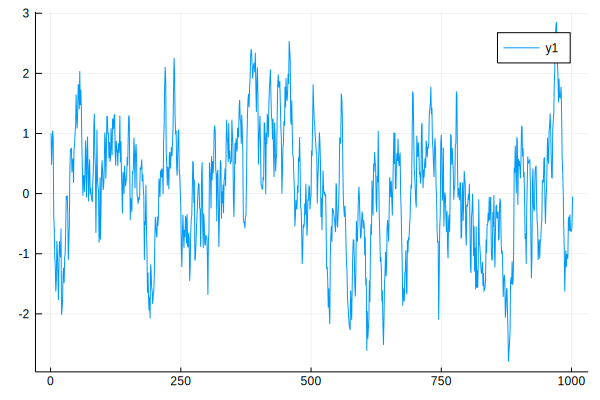

In [6]:
using DifferentialEquations
using Plots

μ = 0.0
σ = sqrt(2)
Θ = 1.0
W = OrnsteinUhlenbeckProcess(Θ,μ,σ,0.0,1.0)
prob = NoiseProblem(W,(0.0,100.0))
sol = solve(prob;dt=0.1)
plot(sol.u)

In [7]:
using Turing
using Distributions

@model ou(r,delta_t=0.1) = begin
    T = length(r)
    ampl ~ Uniform(0.0,5.0)
    tau ~ Uniform(0.0,5.0)
    
    b = exp(-delta_t/tau)
    
    r[1] ~ Normal(0,sqrt(ampl))
    for i=2:T
        r[i] ~ Normal(r[i-1]*b,sqrt(ampl*(1-b^2)))
    end
end

┌ Info: Precompiling Turing [fce5fe82-541a-59a6-adf8-730c64b5f9a0]
└ @ Base loading.jl:1273


  Building Libtask → `~/.julia/packages/Libtask/RjRkK/deps/build.log`


(::DynamicPPL.ModelGen{(:r, :delta_t),var"###ou#470",NamedTuple{(:delta_t,),Tuple{Float64}}}) (generic function with 1 method)

In [8]:
using StatsPlots

chn = sample(ou(sol.u,0.1), NUTS(0.65), 2000)

# Summarise results (currently requires the master branch from MCMCChains)
describe(chn)



┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1273
┌ Info: Found initial step size
│   ϵ = 0.025
└ @ Turing.Inference /Users/hstrey/.julia/packages/Turing/vg86q/src/inference/hmc.jl:555
Sampling   0%|                               |  ETA: 0:49:33
  iteration:                     1
  n_steps:                       1
  is_accept:                     true
  acceptance_rate:               1.0
  log_density:                   -916.6708368651199
  hamiltonian_energy:            5330.356676280802
  hamiltonian_energy_error:      -1395.0563440713076
  max_hamiltonian_energy_error:  -1395.0563440713076
  tree_depth:                    1
  numerical_error:               false
  step_size:                     0.025
  nom_step_size:                 0.025
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0])┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)


2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 1 columns
│ Row │ parameters │ mean    │ std      │ naive_se   │ mcse      │ ess     │
│     │ Symbol     │ Float64 │ Float64  │ Float64    │ Float64   │ Any     │
├─────┼────────────┼─────────┼──────────┼────────────┼───────────┼─────────┤
│ 1   │ ampl       │ 1.0827  │ 0.171298 │ 0.00541691 │ 0.0123929 │ 192.175 │
│ 2   │ tau        │ 1.09485 │ 0.181487 │ 0.00573913 │ 0.0132411 │ 197.405 │

Quantiles

│ Row │ parameters │ 2.5%     │ 25.0%    │ 50.0%   │ 75.0%   │ 97.5%   │
│     │ Symbol     │ Float64  │ Float64  │ Float64 │ Float64 │ Float64 │
├─────┼────────────┼──────────┼──────────┼─────────┼─────────┼─────────┤
│ 1   │ ampl       │ 0.833594 │ 0.966231 │ 1.06082 │ 1.16726 │ 1.50959 │
│ 2   │ tau        │ 0.829777 │ 0.967269 │ 1.06652 │ 1.18645 │ 1.57002 │


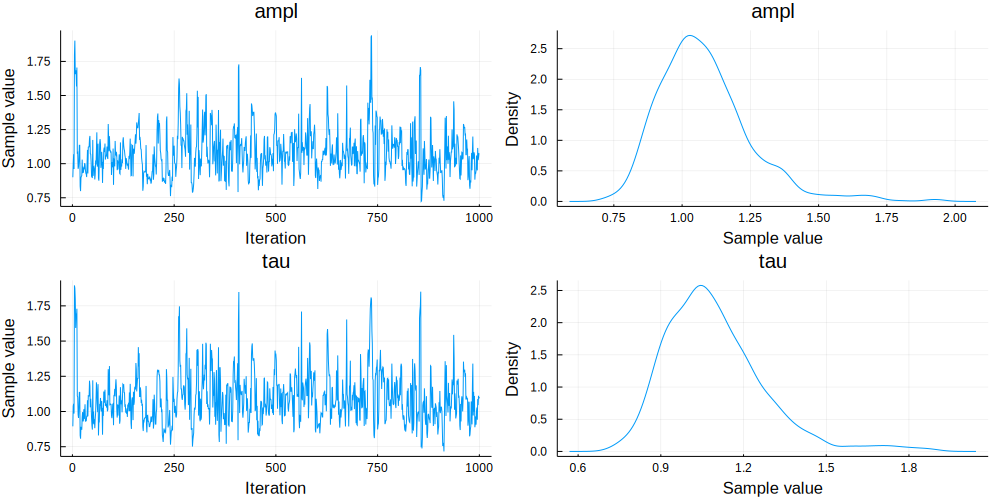

In [9]:
# Plot and save results
p = plot(chn)